In [7]:
%pylab inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [126]:
x= pd.read_csv('Xfeatures.csv', sep = ",")
y= pd.read_csv('Y-FEATURES.csv', sep = ",")

In [15]:
print 'Shape-x: ' + str(x.shape)
print 'Shape-y: ' + str(y.shape)

Shape-x: (51, 7)
Shape-y: (4, 59)


In [16]:
x.head(10)

,suburb,Rockdale,Unnamed: 2,North sydney,Unnamed: 4,Ryde,Unnamed: 6
0,Population,2011,2016,2011,2016,2011,2016
1,M_0_19,211,236,18,19,135,126
2,M_20_64,1065,1082,178,183,329,327
3,M_65plus,105,124,13,11,65,73
4,M_Total,1382,1443,210,212,530,525
5,F_0_19,203,221,25,27,120,118
6,F_20_64,888,922,147,148,312,314
7,F_65plus,90,122,9,13,78,84
8,F_Total,1181,1265,180,187,510,516
9,T_0_19,414,457,43,46,255,244


In [17]:
y.head(10)

,Separate Houses - All Bedroom Numbers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,Suburbs,3/1/16 0:00,6/1/16 0:00,9/1/16 0:00,12/1/16 0:00,3/2/16 0:00,6/2/16 0:00,9/2/16 0:00,12/2/16 0:00,3/3/16 0:00,...,3/13/16 0:00,6/13/16 0:00,9/13/16 0:00,12/13/16 0:00,3/14/16 0:00,6/14/16 0:00,9/14/16 0:00,12/14/16 0:00,3/15/16 0:00,6/15/16 0:00
1,North Sydney,600,550,570,555,550,530,560,530,600,...,973,990,960,"1,100",973,"1,175",850,"1,115","1,115","1,150"
2,Rockdale,310,320,310,300,300,300,300,300,300,...,530,500,500,550,550,560,568,550,580,570
3,Ryde,340,350,340,350,340,345,340,340,338,...,580,570,620,620,620,615,645,630,660,650


In [127]:
ytrans=y.transpose()

In [128]:
ytrans.columns = ytrans.iloc[0]
ytrans.head(4)

Separate Houses - All Bedroom Numbers,Suburbs,North Sydney,Rockdale,Ryde
Separate Houses - All Bedroom Numbers,Suburbs,North Sydney,Rockdale,Ryde
Unnamed: 1,3/1/16 0:00,600,310,340
Unnamed: 2,6/1/16 0:00,550,320,350
Unnamed: 3,9/1/16 0:00,570,310,340


In [129]:
ytrans=ytrans.drop('Separate Houses - All Bedroom Numbers')
ytrans.head(4)

Separate Houses - All Bedroom Numbers,Suburbs,North Sydney,Rockdale,Ryde
Unnamed: 1,3/1/16 0:00,600,310,340
Unnamed: 2,6/1/16 0:00,550,320,350
Unnamed: 3,9/1/16 0:00,570,310,340
Unnamed: 4,12/1/16 0:00,555,300,350


In [130]:
ytrans.index =ytrans['Suburbs']

In [131]:
ytrans.head(3)

Separate Houses - All Bedroom Numbers,Suburbs,North Sydney,Rockdale,Ryde
Suburbs,,,,
3/1/16 0:00,3/1/16 0:00,600,310,340
6/1/16 0:00,6/1/16 0:00,550,320,350
9/1/16 0:00,9/1/16 0:00,570,310,340


In [132]:
ytrans[['North Sydney','Rockdale','Ryde']] = ytrans[['North Sydney','Rockdale','Ryde']].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [138]:
import datetime as datetime
ytrans[['Suburbs']]=ytrans['Suburbs'].apply(lambda z : datetime.datetime.strptime(z, "%m/%d/%y %H:%M"))

In [139]:
ytrans.head()

Separate Houses - All Bedroom Numbers,Suburbs,North Sydney,Rockdale,Ryde
Suburbs,,,,
3/1/16 0:00,2016-03-01,600.0,310,340
6/1/16 0:00,2016-06-01,550.0,320,350
9/1/16 0:00,2016-09-01,570.0,310,340
12/1/16 0:00,2016-12-01,555.0,300,350
3/2/16 0:00,2016-03-02,550.0,300,340


In [141]:
df =ytrans
df.dtypes

Separate Houses - All Bedroom Numbers
Suburbs         datetime64[ns]
North Sydney           float64
Rockdale                 int64
Ryde                     int64
dtype: object

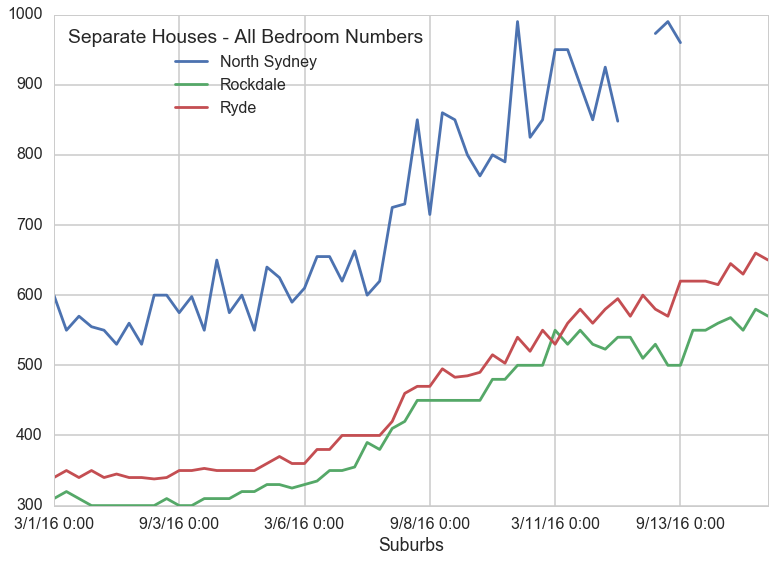

In [153]:

ytrans[['North Sydney','Rockdale', 'Ryde']].plot()

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# This creates a LinearRegression objec
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(ytrans[['Suburbs']], ytrans['Rockdale'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
#preds = lm.predict((float)datetime.date('01/02/25 0:00'))